# PART 1 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# OpenCV uses BGR for OPENCV
# matplotlib uses RGB for showing images
dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_brick = cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

In [9]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [10]:
hist_values.shape

(256, 1)

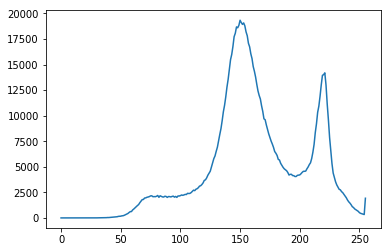

In [15]:
plt.plot(hist_values)

In [16]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

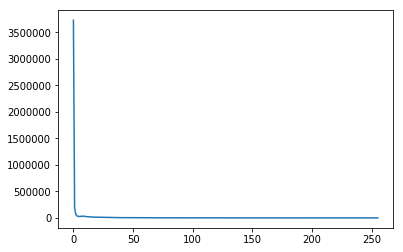

In [17]:
plt.plot(hist_values)

Text(0.5,1,'HISTOGRAM FOR BLUE BRICKS')

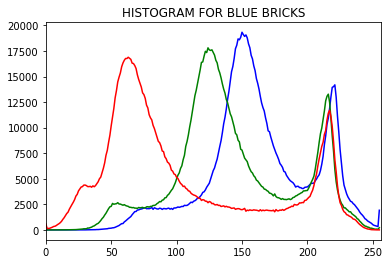

In [30]:
img = blue_bricks
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],channels=[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    
plt.title('HISTOGRAM FOR BLUE BRICKS')

# PART 2

In [31]:
# equaliation flattens the histogram to give it more contrast
# minimum goes to 0, while maximum values goes to 255
rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

In [32]:
img = rainbow
img.shape

(550, 413, 3)

In [33]:
mask = np.zeros(img.shape[:2],np.uint8)

In [35]:
mask[300:400,100:400] = 255

In [36]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

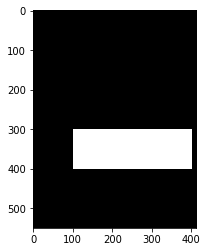

In [38]:
plt.imshow(mask,cmap='gray')

In [41]:
masked_img = cv2.bitwise_and(img,img,mask=mask)

In [47]:
# this is purely for visualization purposes
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

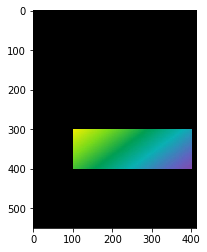

In [48]:
plt.imshow(show_masked_img)

In [52]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

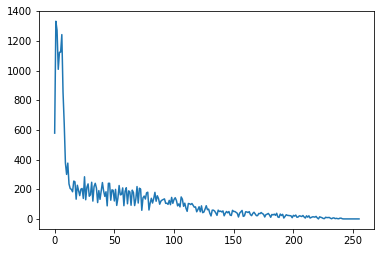

In [55]:
# SHOW MASKED HISTOGRAM
plt.plot(hist_mask_values_red)

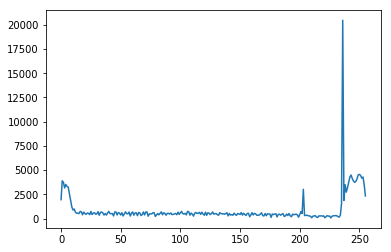

In [57]:
# SHOW GENERAL HISTOGRAM
plt.plot(hist_values_red)

# PART 3


In [76]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

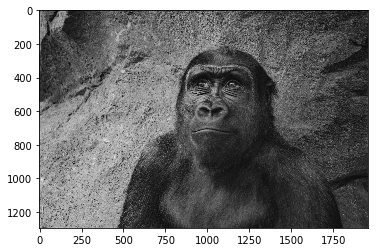

In [78]:
plt.imshow(gorilla,cmap='gray')

In [81]:
gorilla.shape

(1295, 1955)

<BarContainer object of 256 artists>

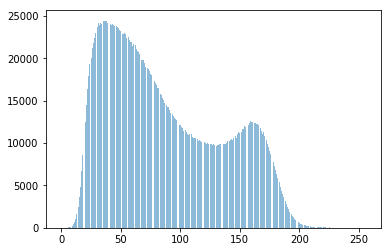

In [112]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.bar(np.arange(len(hist_values)), [x[0] for x in hist_values.tolist()], align='center', alpha=0.5)

In [113]:
eq_gorilla = cv2.equalizeHist(gorilla)

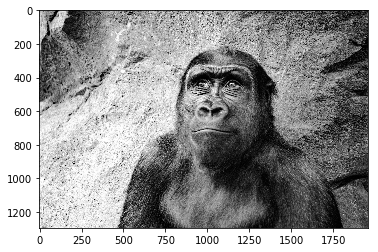

In [114]:
plt.imshow(eq_gorilla,cmap='gray')

<BarContainer object of 256 artists>

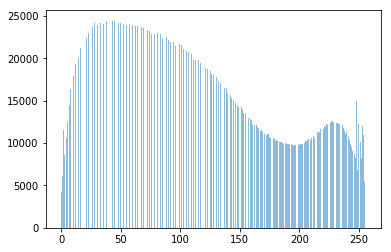

In [116]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.bar(np.arange(len(hist_values)), [x[0] for x in hist_values.tolist()], align='center', alpha=0.5)

In [117]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

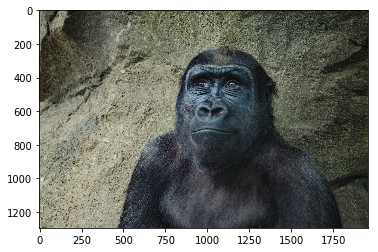

In [119]:
plt.imshow(show_gorilla)

In [120]:
hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

In [122]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [123]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

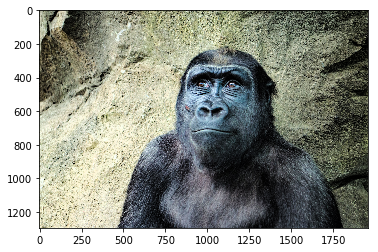

In [126]:
plt.imshow(eq_color_gorilla)